<a href="https://colab.research.google.com/github/noweahc/energy/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [4]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [5]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [6]:
train = pd.read_csv('/content/drive/MyDrive/23energy/23data/train.csv',encoding = 'utf-8')
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [7]:
train.shape

(204000, 10)

In [8]:
train = train.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train.drop('num_date_time', axis = 1, inplace=True)

In [9]:
train.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [10]:
test = pd.read_csv('/content/drive/MyDrive/23energy/23data/test.csv',encoding = 'utf-8')
test.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [11]:
test = test.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test.drop('num_date_time', axis = 1, inplace=True)

In [12]:
test.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity
0,1,20220825 00,23.5,0.0,2.2,72
1,1,20220825 01,23.0,0.0,0.9,72
2,1,20220825 02,22.7,0.0,1.5,75
3,1,20220825 03,22.1,0.0,1.3,78
4,1,20220825 04,21.8,0.0,1.0,77


In [13]:
building = pd.read_csv('/content/drive/MyDrive/23energy/23data/building_info.csv',encoding = 'utf-8')
building.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [14]:
building = building.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})

In [15]:
building.head()

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [16]:
train = pd.merge(train, building, on='building_number', how='left')
test = pd.merge(test, building, on='building_number', how='left')

In [17]:
# 문자열을 실수형으로 변환하고 "-"을 0으로 대체합니다.
train["solar_power_capacity"] = train["solar_power_capacity"].apply(lambda x: float(x) if x != "-" else 0)
train["ess_capacity"] = train["ess_capacity"].apply(lambda x: float(x) if x != "-" else 0)
train["pcs_capacity"] = train["pcs_capacity"].apply(lambda x: float(x) if x != "-" else 0)

# 문자열을 실수형으로 변환하고 "-"을 0으로 대체합니다.
test["solar_power_capacity"] = test["solar_power_capacity"].apply(lambda x: float(x) if x != "-" else 0)
test["ess_capacity"] = test["ess_capacity"].apply(lambda x: float(x) if x != "-" else 0)
test["pcs_capacity"] = test["pcs_capacity"].apply(lambda x: float(x) if x != "-" else 0)

In [18]:
print(train.shape)
print(test.shape)

(204000, 15)
(16800, 12)


In [19]:
print('강수량 null: ', train['rainfall'].isnull().sum())
print('일조 null: ', train['sunshine'].isnull().sum())
print('일사 null: ', train['solar_radiation'].isnull().sum())

강수량 null:  160069
일조 null:  75182
일사 null:  87913


In [20]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline

# 특정 열에 대한 결측치를 보간하기 위한 함수


# Function to interpolate missing data
def interpolate_spline(data, column):
    # Get mask of nulls for the current column
    mask = data[column].isnull()    # isnull()함수를 사용해서 해당 열에서 값이 없는 위치에 불리언 mask를 생성합니다

    # Interpolation function, with kind='cubic', interpld 함수를 사용하여 결측치가 없는 데이터에 대한 보간 함수를 생성하고
    # 이 보간함수는 데이터의 인덱스를 입력으로 받아 해당 위치의 값을 추정합니다. cubic 보간은 결측치를 보간하는 방법으로 3차 스플라인으로 추정
    interp_function = interp1d(data[~mask].index, data[~mask][column], kind='cubic', fill_value="extrapolate", bounds_error=False)

    # Apply interpolation, 생성한 보간 함수를 사용하여 결측치가 있는 위치의 값을 추정하고 원래 데이터프레임의 해당 위치의 추정값 넣기
    data.loc[mask, column] = interp_function(data[mask].index)

    return data

In [21]:
buildings = train['building_number'].unique()
# Handle missing values in each building
for building in buildings:
    building_data = train[train['building_number'] == building].copy()

    # Interpolate missing data for humidity and wind speed
    building_data = interpolate_spline(building_data, 'humidity')
    building_data = interpolate_spline(building_data, 'windspeed')

    # If there are still missing values, fill them with the median
    #if building_data['hum)'].isnull().sum() > 0:
     #   building_data['hum'].fillna(building_data['hum'].median(), inplace=True)
    #if building_data['wind'].isnull().sum() > 0:
     #   building_data['wind'].fillna(building_data['wind'].median(), inplace=True)

    # Update original data
    train.loc[train['building_number'] == building] = building_data

# Checking missing values again
missing_values_updated = train.isnull().sum()

missing_values_updated

building_number              0
date_time                    0
temperature                  0
rainfall                160069
windspeed                    0
humidity                     0
sunshine                 75182
solar_radiation          87913
power_consumption            0
building_type                0
total_area                   0
cooling_area                 0
solar_power_capacity         0
ess_capacity                 0
pcs_capacity                 0
dtype: int64

In [22]:
train['building_number'].value_counts()

1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: building_number, Length: 100, dtype: int64

In [23]:
# PCS는 ESS(전력 에너지 저장 장치) 전력 변환 장치라고 함
# https://blog.naver.com/PostView.naver?blogId=dsjang650628&logNo=222234935222 참고
print('태양광발전기없음: ', len(train[train['solar_power_capacity'] == '-']))
print('ESS없음: ',len(train[train['ess_capacity'] == '-']))
print('PCS없음: ',len(train[train['pcs_capacity'] == '-']))

태양광발전기없음:  0
ESS없음:  0
PCS없음:  0


In [24]:
#ess,pcs 둘은 같이 있거나 같이 없거나.
#ess,pcs 가진 건물번호는 5,7,19,21,71번
train[(train['ess_capacity'] != '-') & (train['pcs_capacity'] != '-')]['building_number'].value_counts()

1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: building_number, Length: 100, dtype: int64

In [25]:
#ess,pcs 가진 건물타입은 건물기타(?), 공공건물, 연구소건물
train[(train['ess_capacity'] != '-') & (train['pcs_capacity'] != '-')]['building_type'].value_counts()

건물기타       30600
공공         16320
대학교        16320
백화점및아울렛    16320
병원         16320
상용         16320
아파트        16320
연구소        16320
지식산업센터     16320
할인마트       16320
호텔및리조트     16320
데이터센터      10200
Name: building_type, dtype: int64

In [26]:
#파생변수 1: 체감온도
train['sensory_temp'] = 13.12 + 0.6215 * train['temperature'] - 11.37 * (train['windspeed'] ** 0.16) + 0.3965 * (train['windspeed'] ** 0.16) * train['temperature']
train

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,sensory_temp
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.00,39570.00,0.0,0.0,0.0,20.751584
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.00,39570.00,0.0,0.0,0.0,20.008954
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.00,39570.00,0.0,0.0,0.0,19.476910
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.00,39570.00,0.0,0.0,0.0,18.487958
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.00,39570.00,0.0,0.0,0.0,19.751534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,25.302757
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,24.446518
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,23.433400
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,23.661275


In [27]:
def make_time(train):
    """
    시간 관련 변수를 추가하기 위한 함수
    """
    train['date_time'] = pd.to_datetime(train.date_time)

    train['month'] = train.date_time.dt.month                    # 월(숫자)
    train['day'] = train.date_time.dt.day                        # 일(숫자)
    train['hour'] = train.date_time.dt.hour                      # 시(숫자)
    train['weekday'] = train.date_time.dt.weekday                # 요일(숫자)
    train['dayofyear'] = train.date_time.dt.dayofyear            # 연 기준 몇일째(숫자)

    return train

In [28]:
train = make_time(train)
test = make_time(test)

In [29]:
#현충일,광복절 주말로 처리
train.loc[train.weekday >= 5, 'holiday'] = 1
train.loc[train.weekday < 5, 'holiday'] = 0

test.loc[test.weekday >= 5, 'holiday'] = 1
test.loc[test.weekday < 5, 'holiday'] = 0

In [30]:
#건물유형 숫자로 처리하는 라벨인코딩
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps


def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

In [31]:
train_le = make_label_map(train[['building_type']])
builtype_df = label_encoder(train[['building_type']], train_le)
train['building_type'] = builtype_df[['building_type']]

{'building_type': {'unknown': 0, '건물기타': 1, '공공': 2, '대학교': 3, '데이터센터': 4, '백화점및아울렛': 5, '병원': 6, '상용': 7, '아파트': 8, '연구소': 9, '지식산업센터': 10, '할인마트': 11, '호텔및리조트': 12}}


<ipython-input-30-b0f06305a5e6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = dataframe[col].map(label_map[col])
<ipython-input-30-b0f06305a5e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.


In [32]:
#파생변수 : 체감온도
train['sensory_temp'] = 13.12 + 0.6215 * train['temperature'] - 11.37 * (train['windspeed'] ** 0.16) + 0.3965 * (train['windspeed'] ** 0.16) * train['temperature']
train.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,...,solar_power_capacity,ess_capacity,pcs_capacity,sensory_temp,month,day,hour,weekday,dayofyear,holiday
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,1,...,0.0,0.0,0.0,20.751584,6,1,0,2,152,0.0
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,1,...,0.0,0.0,0.0,20.008954,6,1,1,2,152,0.0
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,1,...,0.0,0.0,0.0,19.476910,6,1,2,2,152,0.0
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,1,...,0.0,0.0,0.0,18.487958,6,1,3,2,152,0.0
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,1,...,0.0,0.0,0.0,19.751534,6,1,4,2,152,0.0


In [33]:
test['sensory_temp'] = 13.12 + 0.6215 * test['temperature'] - 11.37 * (test['windspeed'] ** 0.16) + 0.3965 * (test['windspeed'] ** 0.16) * test['temperature']
test.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,month,day,hour,weekday,dayofyear,holiday,sensory_temp
0,1,2022-08-25 00:00:00,23.5,0.0,2.2,72,건물기타,110634.0,39570.0,0.0,0.0,0.0,8,25,0,3,237,0.0,25.397063
1,1,2022-08-25 01:00:00,23.0,0.0,0.9,72,건물기타,110634.0,39570.0,0.0,0.0,0.0,8,25,1,3,237,0.0,25.201620
2,1,2022-08-25 02:00:00,22.7,0.0,1.5,75,건물기타,110634.0,39570.0,0.0,0.0,0.0,8,25,2,3,237,0.0,24.699788
3,1,2022-08-25 03:00:00,22.1,0.0,1.3,78,건물기타,110634.0,39570.0,0.0,0.0,0.0,8,25,3,3,237,0.0,24.136018
4,1,2022-08-25 04:00:00,21.8,0.0,1.0,77,건물기타,110634.0,39570.0,0.0,0.0,0.0,8,25,4,3,237,0.0,23.942400


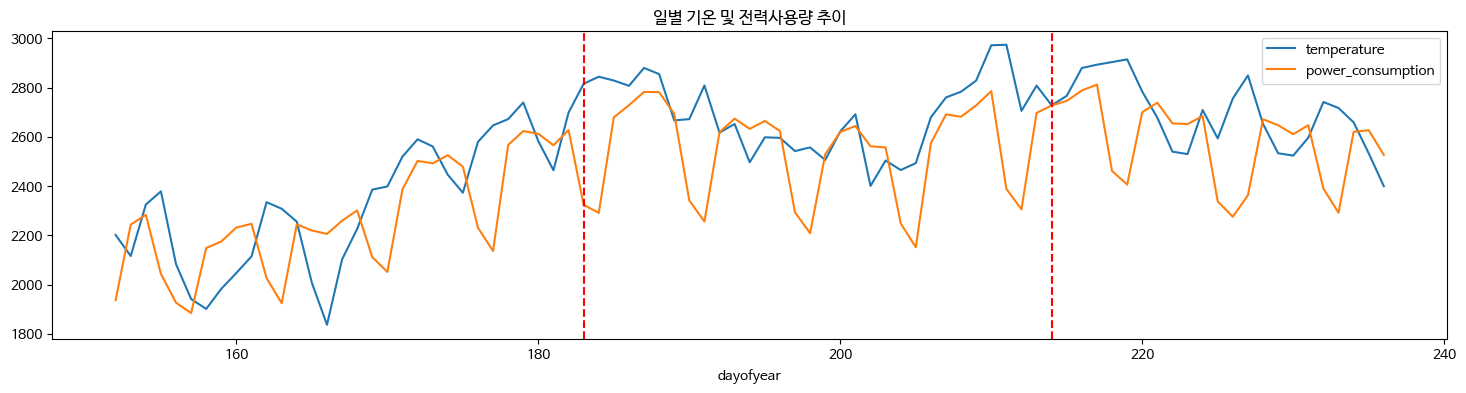

In [34]:
(train.groupby(['dayofyear'])['temperature'].mean()*100).plot(figsize=(18, 4))
train.groupby(['dayofyear'])['power_consumption'].mean().plot(figsize=(18, 4))
plt.legend(['temperature', 'power_consumption'])
plt.axvline(x = 183, color = 'r', linestyle = '--',)
plt.axvline(x = 214, color = 'r', linestyle = '--',)
plt.title('일별 기온 및 전력사용량 추이')
plt.show()

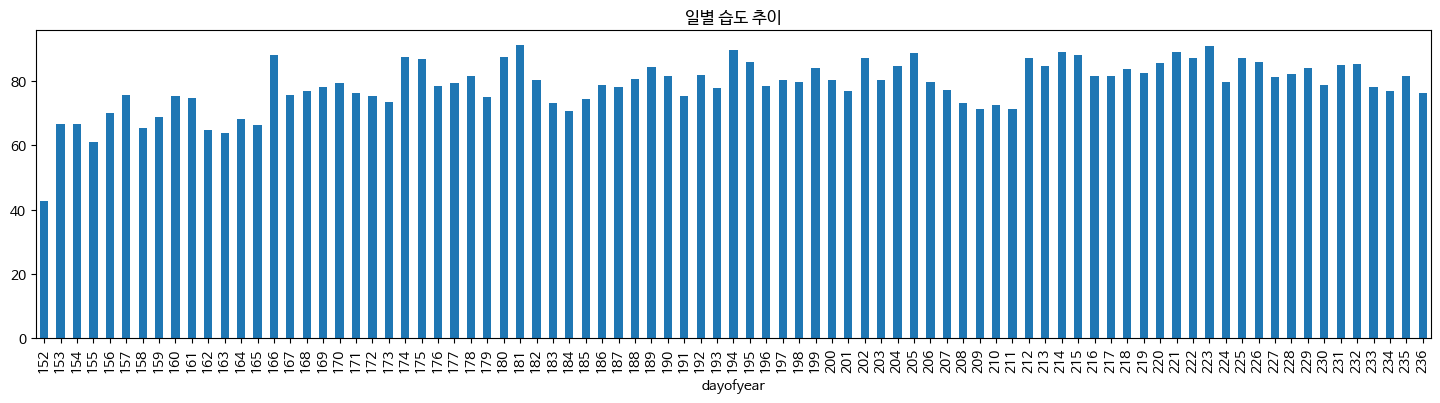

In [35]:
(train.groupby(['dayofyear'])['humidity'].mean()).plot(kind='bar', figsize=(18, 4))
plt.title('일별 습도 추이')
plt.show()

In [36]:
#상관관계 분석을 위함
train_corrdf = train.loc[:,['temperature','windspeed','humidity','power_consumption','total_area','cooling_area','sensory_temp']]
train_corrdf

,temperature,windspeed,humidity,power_consumption,total_area,cooling_area,sensory_temp
0,18.6,0.9,42.0,1085.28,110634.00,39570.00,20.751584
1,18.0,1.1,45.0,1047.36,110634.00,39570.00,20.008954
2,17.7,1.5,45.0,974.88,110634.00,39570.00,19.476910
3,16.7,1.4,48.0,953.76,110634.00,39570.00,18.487958
4,18.4,2.8,43.0,986.40,110634.00,39570.00,19.751534
...,...,...,...,...,...,...,...
203995,23.1,0.9,86.0,881.04,57497.84,40035.23,25.302757
203996,22.4,1.3,86.0,798.96,57497.84,40035.23,24.446518
203997,21.3,1.0,92.0,825.12,57497.84,40035.23,23.433400
203998,21.0,0.3,94.0,640.08,57497.84,40035.23,23.661275


In [37]:
train_corrdf.isnull().sum()

temperature          0
windspeed            0
humidity             0
power_consumption    0
total_area           0
cooling_area         0
sensory_temp         0
dtype: int64

In [38]:
train_corr = train_corrdf.corr()
train_corr

,temperature,windspeed,humidity,power_consumption,total_area,cooling_area,sensory_temp
temperature,1.000000,0.220234,-0.389889,0.171190,-0.003338,-0.003055,0.994075
windspeed,0.220234,1.000000,-0.219113,0.109959,-0.055010,-0.053790,0.170516
humidity,-0.389889,-0.219113,1.000000,-0.129550,-0.020119,-0.020519,-0.375308
power_consumption,0.171190,0.109959,-0.129550,1.000000,0.013463,0.016444,0.162818
total_area,-0.003338,-0.055010,-0.020119,0.013463,1.000000,0.998884,-0.001116
cooling_area,-0.003055,-0.053790,-0.020519,0.016444,0.998884,1.000000,-0.000891
sensory_temp,0.994075,0.170516,-0.375308,0.162818,-0.001116,-0.000891,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


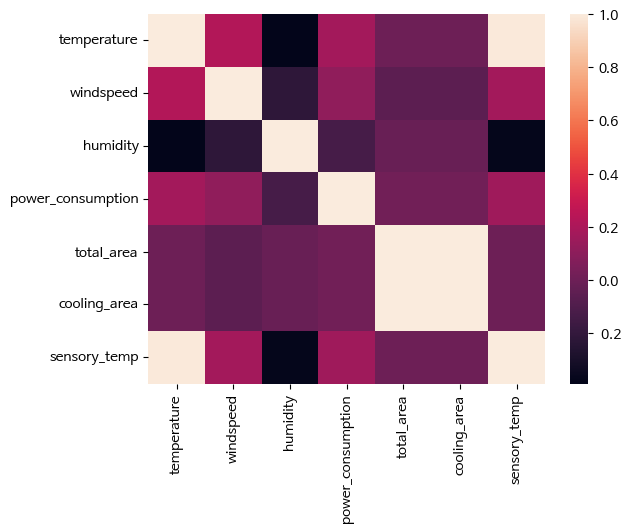

In [39]:
sns.heatmap(train_corrdf.corr())

In [40]:
eda_df = train.copy()
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   building_number       204000 non-null  int64         
 1   date_time             204000 non-null  datetime64[ns]
 2   temperature           204000 non-null  float64       
 3   rainfall              43931 non-null   float64       
 4   windspeed             204000 non-null  float64       
 5   humidity              204000 non-null  float64       
 6   sunshine              128818 non-null  float64       
 7   solar_radiation       116087 non-null  float64       
 8   power_consumption     204000 non-null  float64       
 9   building_type         204000 non-null  int64         
 10  total_area            204000 non-null  float64       
 11  cooling_area          204000 non-null  float64       
 12  solar_power_capacity  204000 non-null  float64       
 13 

<ipython-input-41-a9dacae5af25>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.groupby(['weekday', 'hour'])['power_consumption'].mean().reset_index().pivot('weekday', 'hour', 'power_consumption')
<ipython-input-41-a9dacae5af25>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.groupby(['weekday', 'hour'])['power_consumption'].mean().reset_index().pivot('weekday', 'hour', 'power_consumption')
<ipython-input-41-a9dacae5af25>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.groupby(['weekday', 'hour'])['power_consumption'].mean().reset_index().pivot('weekday', 'hour', 'power_consumption')
<ipython-input-41-a9dacae5af25>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.groupby(['weekday', 'hour'])['power_consumption'].mean().reset_index(

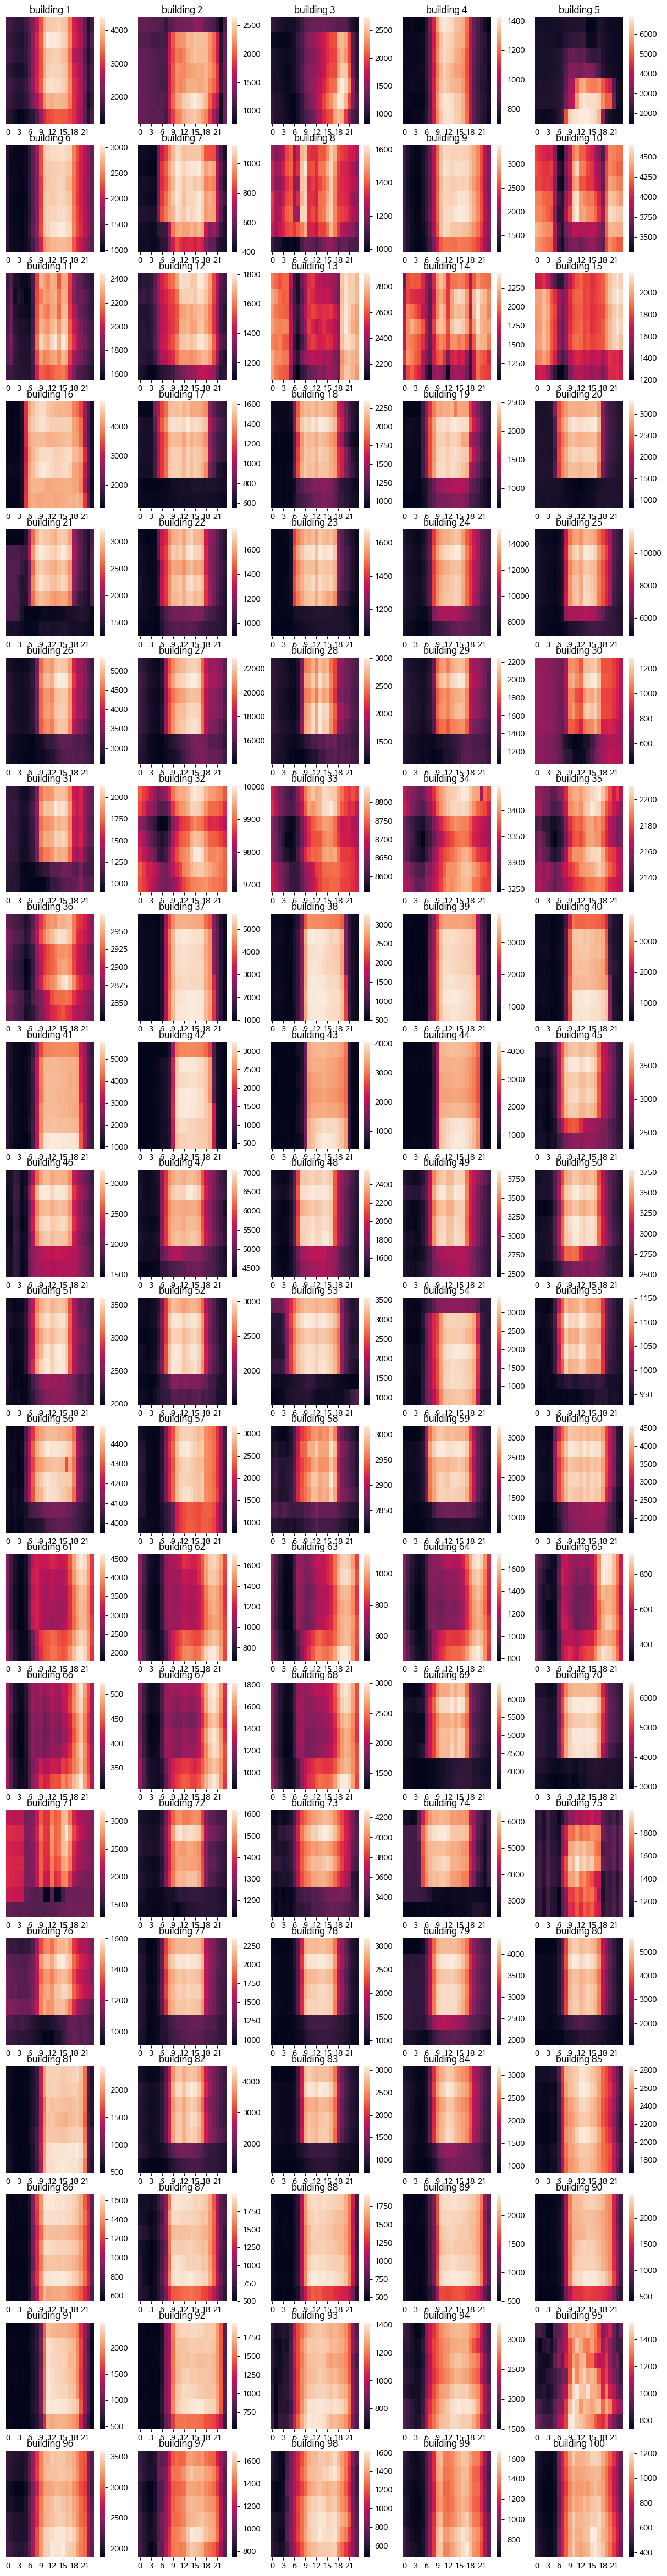

In [41]:
# 건물마다 요일,시간별 전력 사용량 heatmap
# 수요일 오후 5시경 56번 건물 전력 사용량 많음
fig = plt.figure(figsize = (15, 60))
for num in eda_df['building_number'].unique():
    df = eda_df[eda_df.building_number == num]
    df = df.groupby(['weekday', 'hour'])['power_consumption'].mean().reset_index().pivot('weekday', 'hour', 'power_consumption')
    plt.subplot(20, 5, num)
    sns.heatmap(df)
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

<Axes: xlabel='date_time', ylabel='power_consumption'>

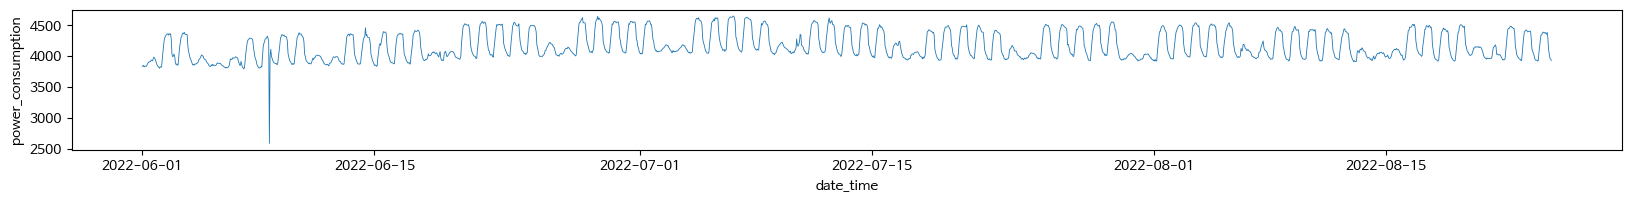

In [42]:
#매주 수요일마다 나타나는 현상인지?
buil_56 = eda_df[eda_df.building_number == 56]
fig = plt.figure(figsize = (20, 4))
plt.subplot(211)
sns.lineplot(data = buil_56, x = 'date_time', y = 'power_consumption', linewidth = 0.6)

<Axes: xlabel='date_time', ylabel='power_consumption'>

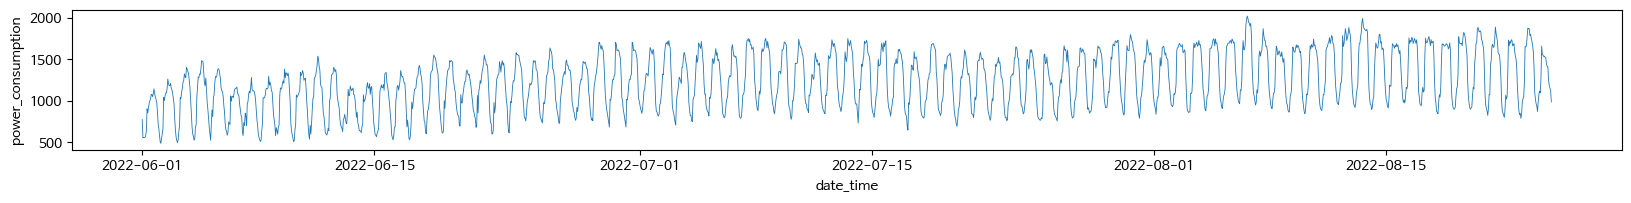

In [43]:
#정상적인 패턴은 어떻게 생겼는지?
buil_97 = eda_df[eda_df.building_number == 97]
fig = plt.figure(figsize = (20, 4))
plt.subplot(211)
sns.lineplot(data = buil_97, x = 'date_time', y = 'power_consumption', linewidth = 0.6)

In [44]:
#6월 8일 16:00 전력 사용량 적은거(이상치까진 아닌가?) 확인
buil_56[(buil_56['month'] == 6) & (buil_56['day'] == 8)]

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,...,solar_power_capacity,ess_capacity,pcs_capacity,sensory_temp,month,day,hour,weekday,dayofyear,holiday
112368,56,2022-06-08 00:00:00,16.5,NaN,3.0,82.0,NaN,NaN,3826.08,7,...,0.0,0.0,0.0,17.619235,6,8,0,2,159,0.0
112369,56,2022-06-08 01:00:00,16.4,NaN,3.6,81.0,NaN,NaN,3806.64,7,...,0.0,0.0,0.0,17.338047,6,8,1,2,159,0.0
112370,56,2022-06-08 02:00:00,16.2,NaN,3.9,80.0,NaN,NaN,3813.84,7,...,0.0,0.0,0.0,17.038147,6,8,2,2,159,0.0
112371,56,2022-06-08 03:00:00,16.1,NaN,2.1,81.0,NaN,NaN,3816.36,7,...,0.0,0.0,0.0,17.511304,6,8,3,2,159,0.0
112372,56,2022-06-08 04:00:00,15.9,NaN,3.9,81.0,NaN,NaN,3833.64,7,...,0.0,0.0,0.0,16.703809,6,8,4,2,159,0.0
112373,56,2022-06-08 05:00:00,15.7,NaN,3.6,81.0,NaN,NaN,3825.00,7,...,0.0,0.0,0.0,16.562314,6,8,5,2,159,0.0
112374,56,2022-06-08 06:00:00,15.9,NaN,1.8,82.0,0.3,0.08,3987.36,7,...,0.0,0.0,0.0,17.436676,6,8,6,2,159,0.0
112375,56,2022-06-08 07:00:00,17.8,NaN,2.5,74.0,0.8,0.57,4150.44,7,...,0.0,0.0,0.0,19.189495,6,8,7,2,159,0.0
112376,56,2022-06-08 08:00:00,17.7,NaN,2.5,74.0,0.1,0.73,4205.52,7,...,0.0,0.0,0.0,19.081435,6,8,8,2,159,0.0
112377,56,2022-06-08 09:00:00,19.0,NaN,2.4,69.0,0.0,1.19,4237.56,7,...,0.0,0.0,0.0,20.515144,6,8,9,2,159,0.0


In [45]:
train[train['building_number'] ==  33]

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,...,solar_power_capacity,ess_capacity,pcs_capacity,sensory_temp,month,day,hour,weekday,dayofyear,holiday
65280,33,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,8313.84,4,...,0.0,0.0,0.0,20.751584,6,1,0,2,152,0.0
65281,33,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,8282.16,4,...,0.0,0.0,0.0,20.008954,6,1,1,2,152,0.0
65282,33,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,8282.88,4,...,0.0,0.0,0.0,19.476910,6,1,2,2,152,0.0
65283,33,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,8257.68,4,...,0.0,0.0,0.0,18.487958,6,1,3,2,152,0.0
65284,33,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,8231.04,4,...,0.0,0.0,0.0,19.751534,6,1,4,2,152,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67315,33,2022-08-24 19:00:00,25.5,NaN,2.9,63.0,0.1,0.19,8702.64,4,...,0.0,0.0,0.0,27.475127,8,24,19,2,236,0.0
67316,33,2022-08-24 20:00:00,25.0,NaN,2.6,66.0,0.0,0.01,8712.00,4,...,0.0,0.0,0.0,26.959240,8,24,20,2,236,0.0
67317,33,2022-08-24 21:00:00,24.6,NaN,1.3,67.0,NaN,NaN,8724.96,4,...,0.0,0.0,0.0,26.723515,8,24,21,2,236,0.0
67318,33,2022-08-24 22:00:00,24.1,NaN,2.1,70.0,NaN,NaN,8727.84,4,...,0.0,0.0,0.0,26.055113,8,24,22,2,236,0.0


In [78]:
train_origin = train.copy()

In [79]:
# 정확한 군집화를 위한 스케일링
for i in range(1, 101):
    mean_ = train.loc[train.building_number == i].power_consumption.mean()
    std_ = train.loc[train.building_number == i].power_consumption.std()
    train.loc[train.building_number == i, 'power_consumption'] = ((train.loc[train.building_number == i, 'power_consumption']) - mean_) / std_

In [80]:
# 요일에 따른 평균 값 산출
weekday_mean = (
    train.groupby(['building_number', 'weekday'])['power_consumption'].mean()
    .reset_index()
    .pivot('building_number', 'weekday', 'power_consumption')
    .reset_index()
)

<ipython-input-80-2298e66bc207>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('building_number', 'weekday', 'power_consumption')


In [81]:
# 시간에 따른 평균 값 산출
hour_mean = (
    train.groupby(['building_number', 'hour'])['power_consumption'].mean()
    .reset_index()
    .pivot('building_number', 'hour', 'power_consumption')
    .reset_index()
    .drop('building_number', axis=1)
)

<ipython-input-81-619c7925230f>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('building_number', 'hour', 'power_consumption')


In [82]:
# 요일별, 시간별 평균 전력 사용량 테이블 구축
cl_df = pd.concat([weekday_mean, hour_mean], axis=1)

In [83]:
columns = (
    ['building_number']
    + ['day_mean_' + str(i) for i in range(7)]
    + ['hour_mean_' + str(i) for i in range(24)]
)

cl_df.columns = columns

In [84]:
cl_df

,building_number,day_mean_0,day_mean_1,day_mean_2,day_mean_3,day_mean_4,day_mean_5,day_mean_6,hour_mean_0,hour_mean_1,...,hour_mean_14,hour_mean_15,hour_mean_16,hour_mean_17,hour_mean_18,hour_mean_19,hour_mean_20,hour_mean_21,hour_mean_22,hour_mean_23
0,1,0.057028,0.118329,0.026747,0.046331,0.122249,-0.024536,-0.348375,-0.850405,-0.925589,...,1.259601,1.188102,1.114280,0.729302,0.217001,0.045677,-0.144661,-0.611473,-1.059946,-0.797619
1,2,-0.753957,0.120806,0.119645,0.131539,0.128772,0.205072,0.038152,-0.714410,-0.725508,...,0.928564,1.016495,0.968835,0.898862,0.844433,0.515599,0.227394,-0.212200,-1.218093,-0.659960
2,3,-0.482379,0.042096,0.015140,0.076904,0.175640,0.185127,-0.013789,-0.703643,-0.781961,...,0.499817,0.704215,0.836388,0.965999,1.393058,1.497521,1.242266,0.618678,-0.262031,-0.609802
3,4,0.030699,0.003484,-0.010449,-0.040663,-0.021789,0.022356,0.017232,-0.967870,-0.988500,...,1.160293,1.142207,1.027696,0.661152,0.132981,-0.404334,-0.588344,-0.736869,-0.819059,-0.955454
4,5,-0.586162,-0.523162,-0.368198,-0.240283,0.445131,0.687107,0.616251,-0.548091,-0.547276,...,0.713041,0.660015,0.620223,0.623779,0.174164,-0.057042,-0.116495,-0.451743,-0.634237,-0.653430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,-0.014765,-0.013869,-0.152756,-0.036847,0.004820,0.110997,0.115150,-1.059854,-1.126981,...,0.947280,0.938573,0.852120,0.866051,0.751448,0.565848,0.350521,0.234235,-0.467344,-0.778792
96,97,-0.112704,0.034202,-0.103556,-0.001833,0.052969,0.148155,-0.008603,-1.036839,-1.208375,...,1.023383,0.972683,0.947532,0.951799,0.776654,0.698041,0.614763,0.257671,-0.290267,-0.739119
97,98,-0.024503,-0.005178,-0.103931,0.008809,0.098611,0.082514,-0.047660,-1.341912,-1.445310,...,0.957492,0.894252,0.943948,1.001261,0.768208,0.545591,0.333566,-0.045194,-0.722357,-1.019012
98,99,0.008584,-0.048854,-0.077305,-0.104016,-0.010065,0.129967,0.108131,-1.077189,-1.232926,...,0.862061,0.982374,1.112446,1.103229,0.869563,0.617385,0.557440,0.192017,-0.397945,-0.806458


# 유사한 전력 사용 추세 보이는 건물끼리 군집화

## 1. DBSCAN (군집 4개, 잘 된 것 같지는 않다..)

In [130]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정 : 4버전
model = DBSCAN(eps=0.5, min_samples=4)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(cl_df)
cl_df['cluster'] = model.fit_predict(cl_df.iloc[:,1:])

In [131]:
train_cl = pd.merge(train, cl_df[['building_number','cluster']],how='left',on='building_number')

In [132]:
test_cl = test.copy()

In [133]:
for i in range(1, 101):
    test_cl.loc[test_cl.building_number == i, 'cluster'] = (
        train_cl.loc[train_cl.building_number == i, 'cluster'].max()
    )

In [134]:
train_cl.cluster.value_counts()

-1    171360
 0     12240
 1     10200
 2     10200
Name: cluster, dtype: int64

In [136]:
db_m1 = list(train_cl.loc[train_cl.cluster == -1].building_number.unique())
db_0 = list(train_cl.loc[train_cl.cluster == 0].building_number.unique())
db_1 = list(train_cl.loc[train_cl.cluster == 1].building_number.unique())
db_2 = list(train_cl.loc[train_cl.cluster == 2].building_number.unique())


In [142]:
print(len(db_m1))
print(len(db_0))
print(len(db_1))
print(len(db_2))

84
6
5
5


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) miss

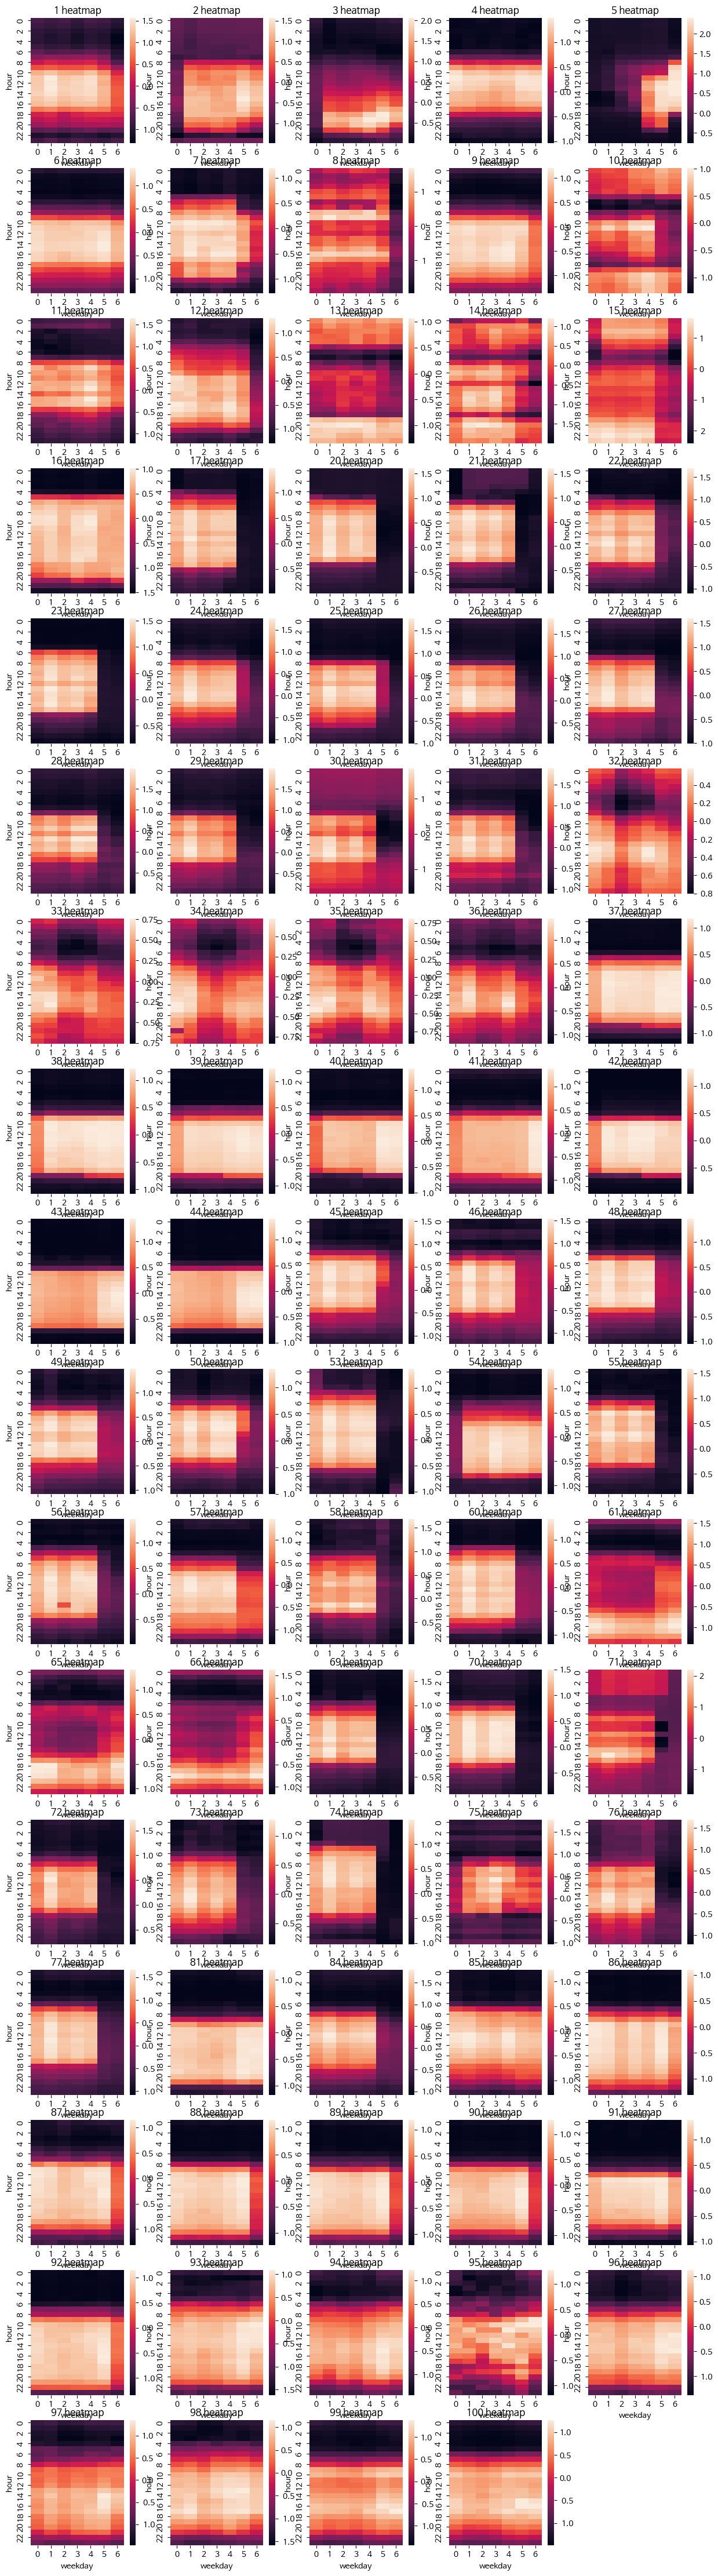

In [150]:
fig = plt.figure(figsize = (15, 60))
for i, n in enumerate(db_m1):
  plt.subplot(18,5,i+1)
  plt.title("{} heatmap".format(n))
  sns.heatmap(train.loc[train.building_number == n].groupby(['weekday', 'hour'])['power_consumption'].mean().unstack().T)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}

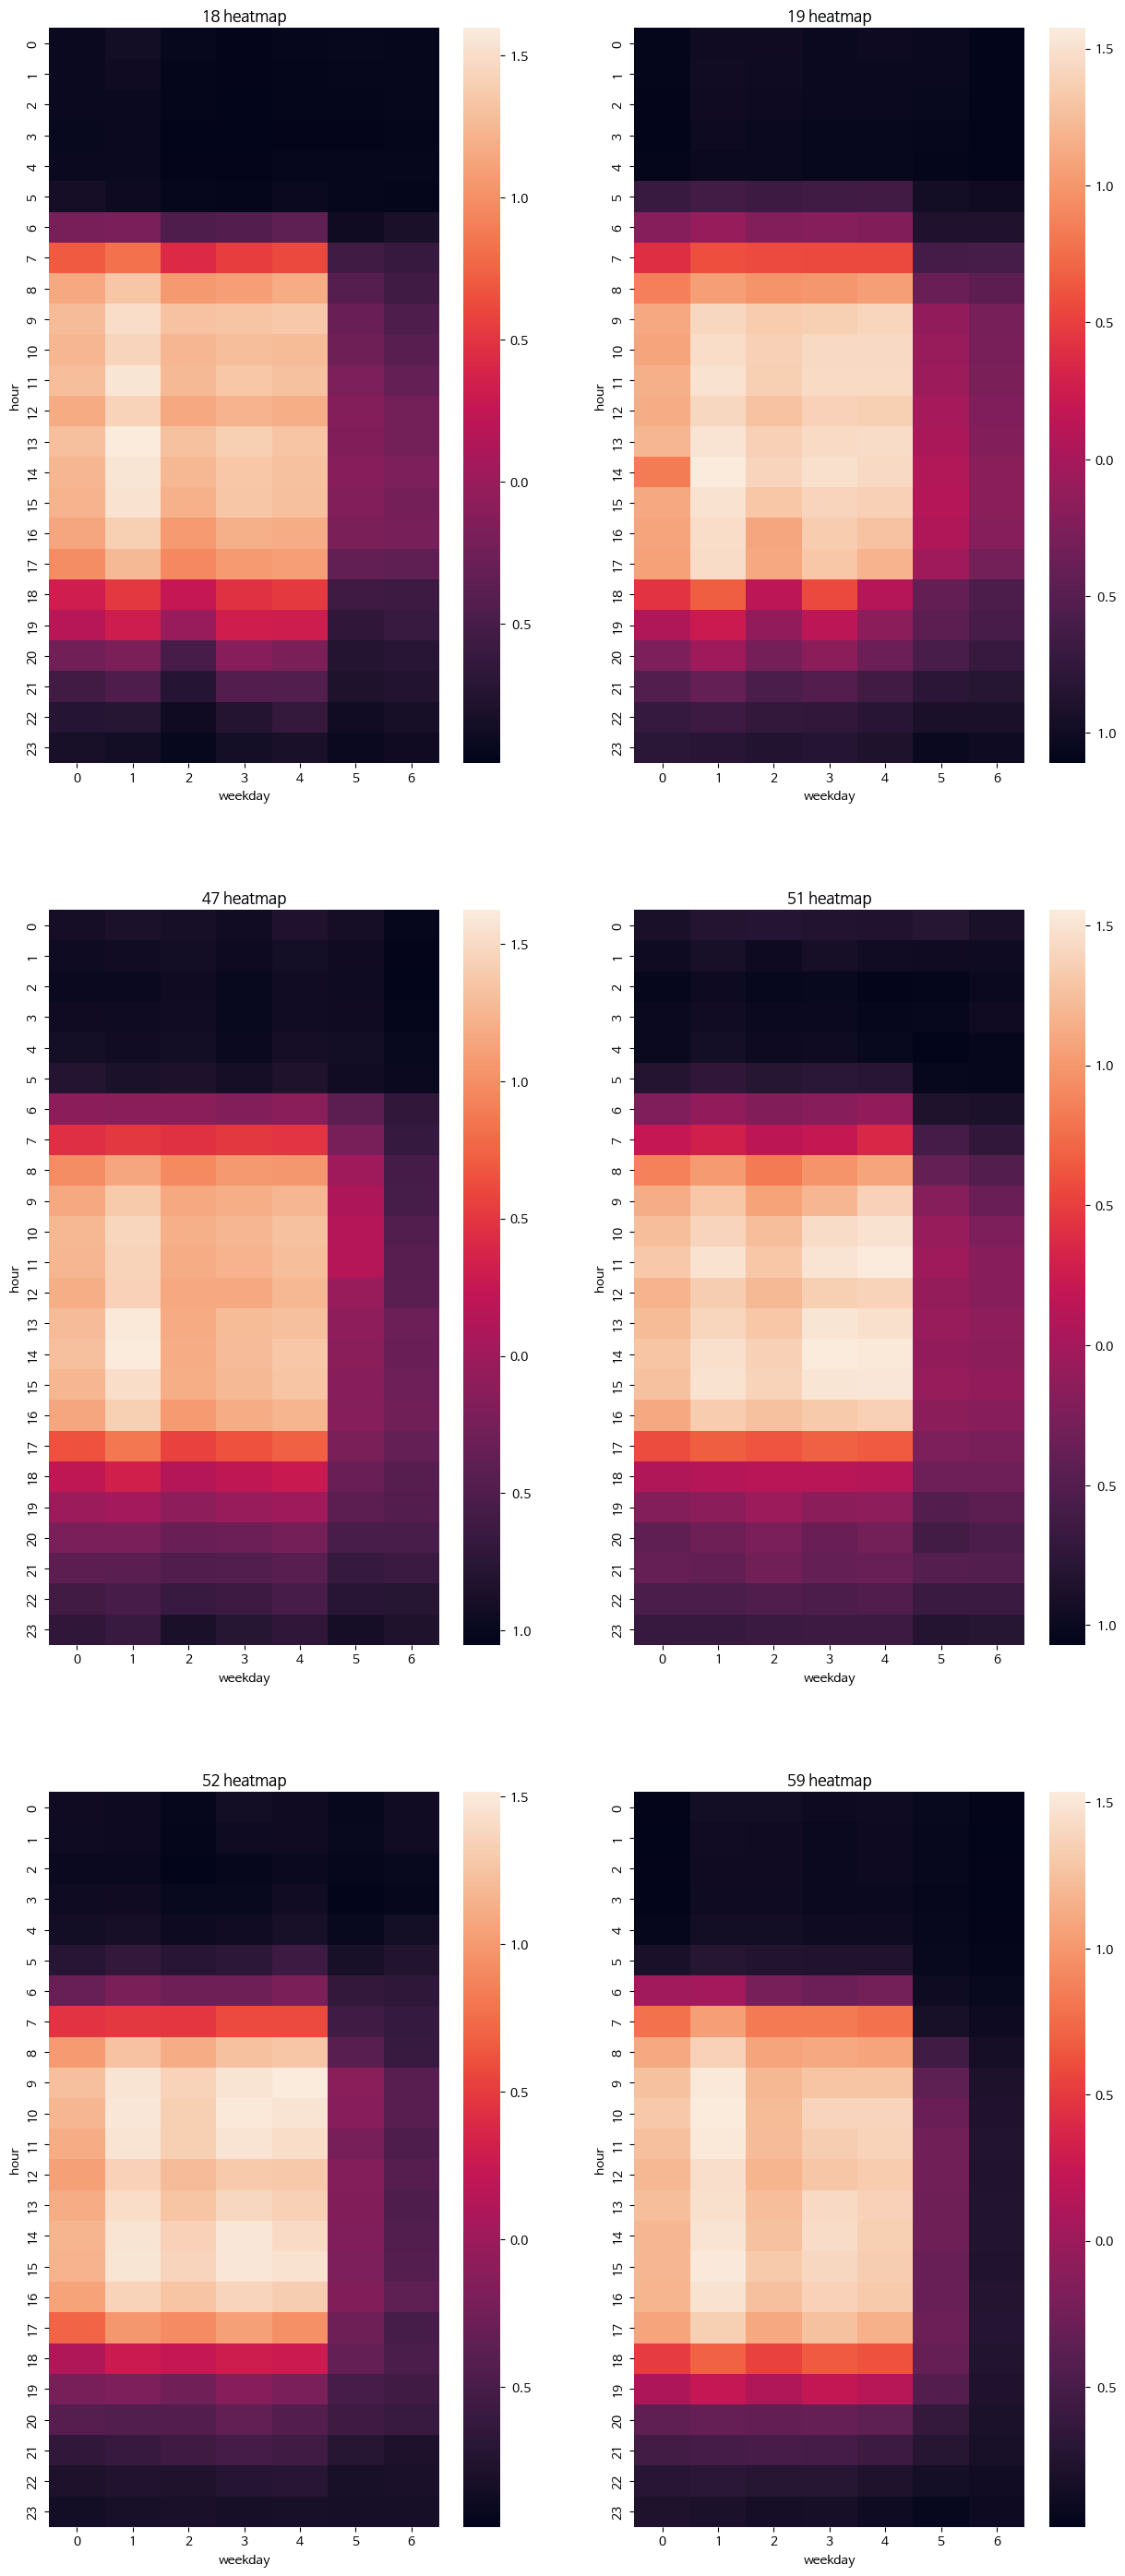

In [146]:
fig = plt.figure(figsize = (15, 60))
for i, n in enumerate(db_0):
  plt.subplot(5,2,i+1)
  plt.title("{} heatmap".format(n))
  sns.heatmap(train.loc[train.building_number == n].groupby(['weekday', 'hour'])['power_consumption'].mean().unstack().T)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 

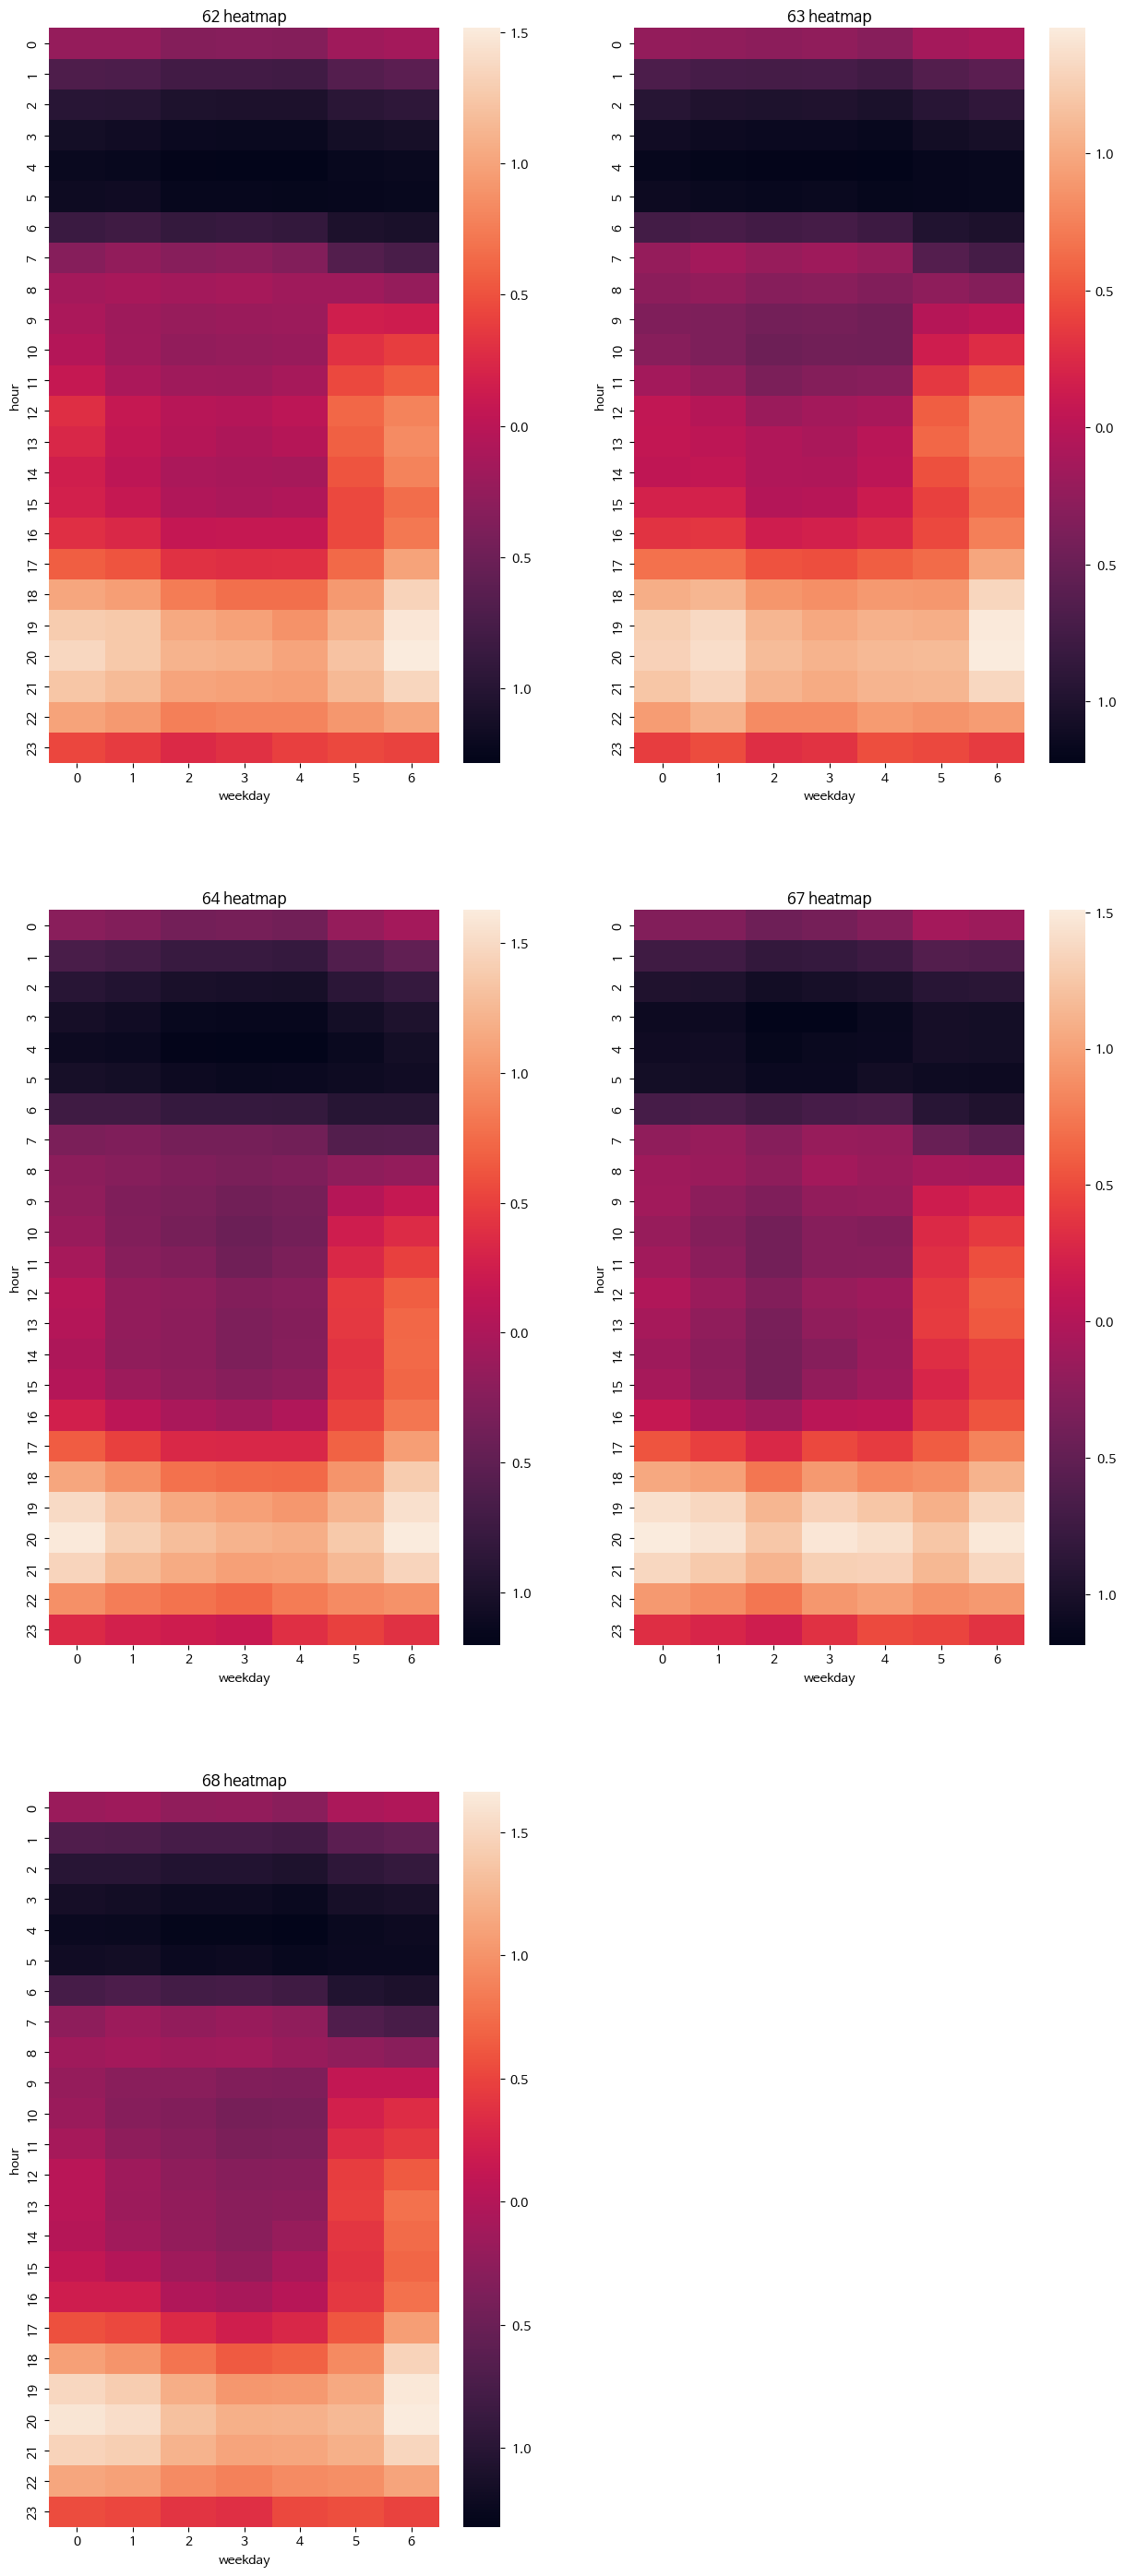

In [147]:
fig = plt.figure(figsize = (15, 60))
for i, n in enumerate(db_1):
  plt.subplot(5,2,i+1)
  plt.title("{} heatmap".format(n))
  sns.heatmap(train.loc[train.building_number == n].groupby(['weekday', 'hour'])['power_consumption'].mean().unstack().T)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 

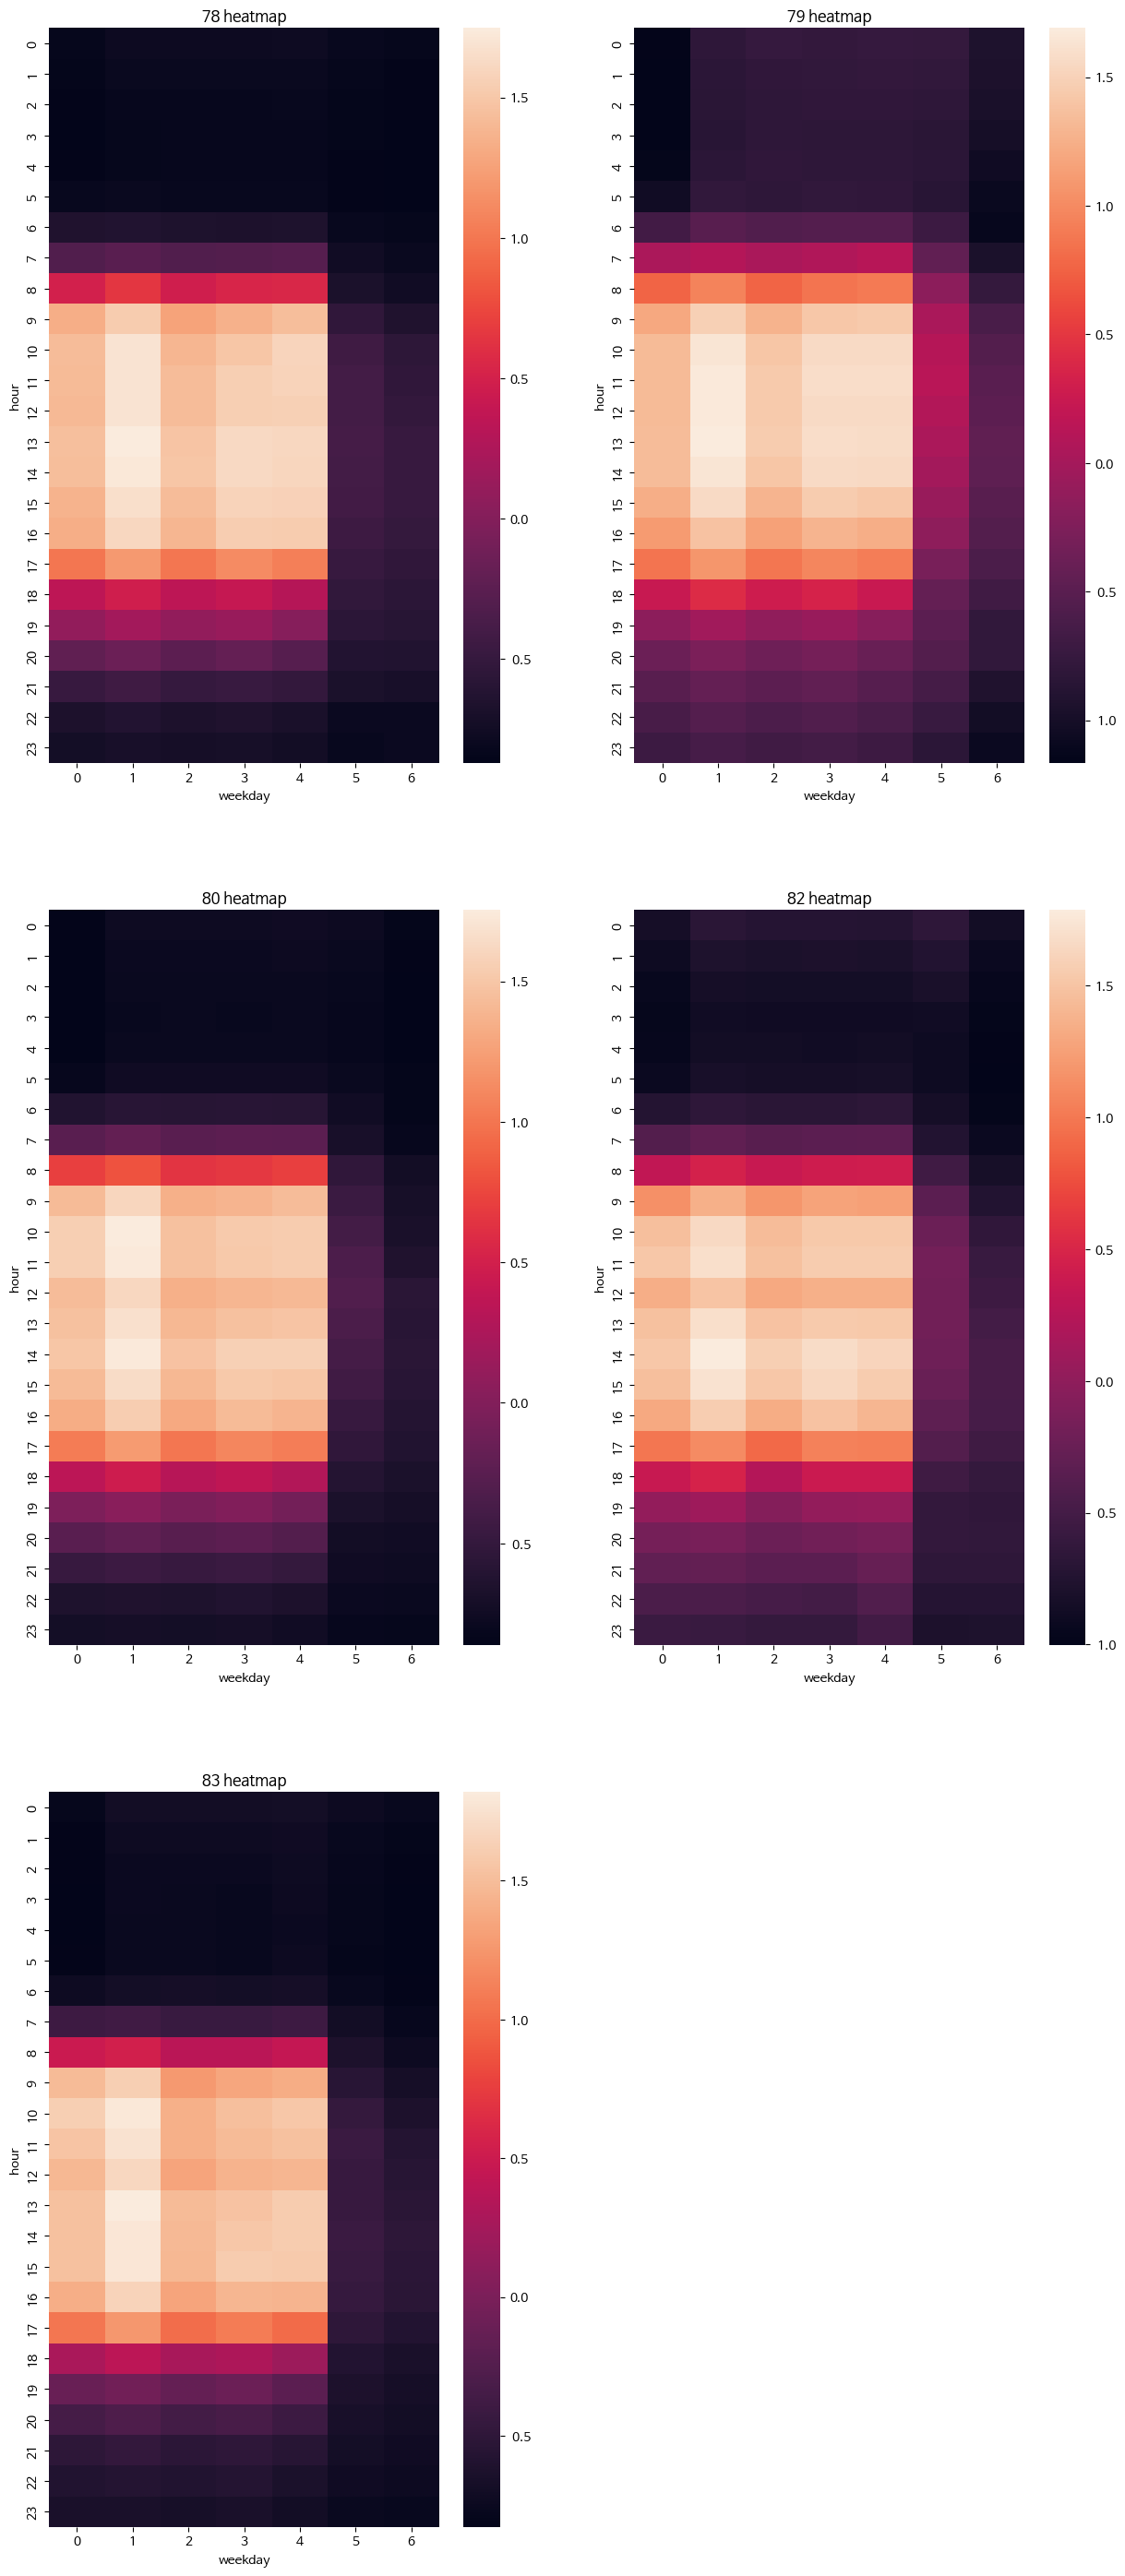

In [148]:
fig = plt.figure(figsize = (15, 60))
for i, n in enumerate(db_2):
  plt.subplot(5,2,i+1)
  plt.title("{} heatmap".format(n))
  sns.heatmap(train.loc[train.building_number == n].groupby(['weekday', 'hour'])['power_consumption'].mean().unstack().T)

## 2. K-means